In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading all the datasets required
iris = pd.read_csv(r'../../datasets/iris.csv')
wine_quality = pd.read_csv(r'../../datasets/winequality-red.csv')
titanic =  pd.read_csv(r'../../datasets/titanic.csv')

### <span style="color:blue">In Iris Dataset, plot a scatter plot differentiating each classifier with a boundary.</span>

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [5]:
iris_columns = list(iris.columns)
display(iris_columns)
iris_columns.remove('Species')
display(iris_columns)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [6]:
setosa = iris[iris['Species']=='setosa']
virginica = iris[iris['Species']=='virginica']
versicolor = iris[iris['Species']=='versicolor']

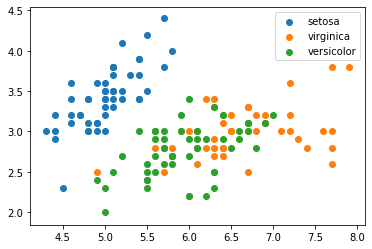

In [7]:
plt.scatter(setosa['Sepal.Length'],setosa['Sepal.Width'],label='setosa')
plt.scatter(virginica['Sepal.Length'],virginica['Sepal.Width'],label='virginica')
plt.scatter(versicolor['Sepal.Length'],versicolor['Sepal.Width'],label='versicolor')
plt.legend()
plt.show()

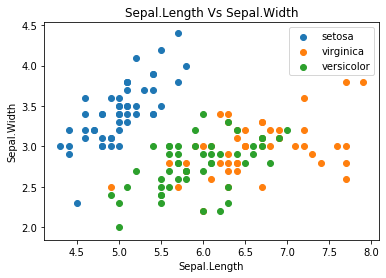

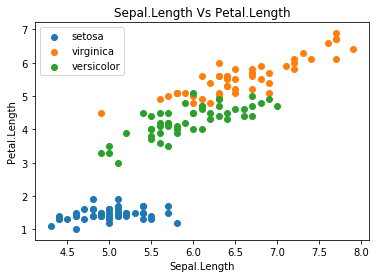

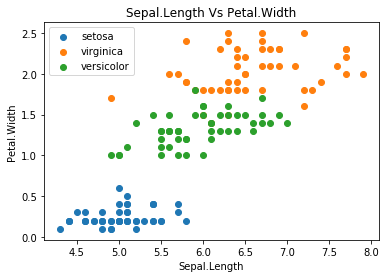

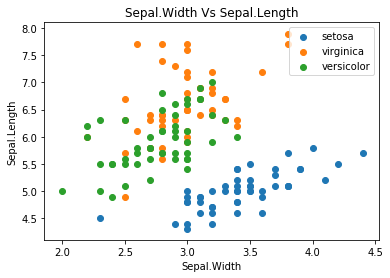

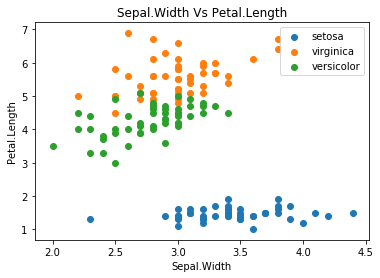

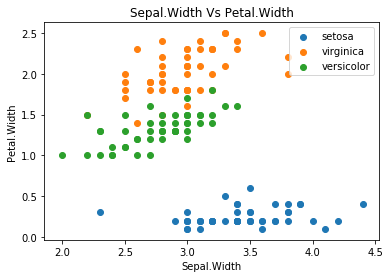

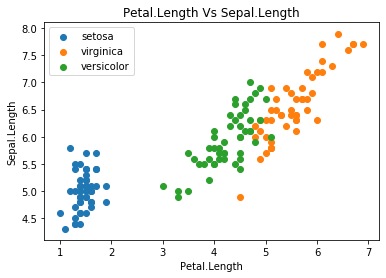

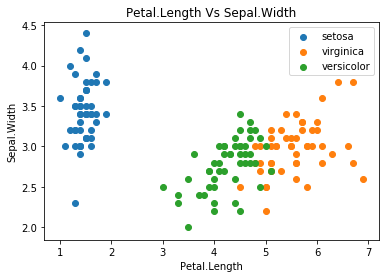

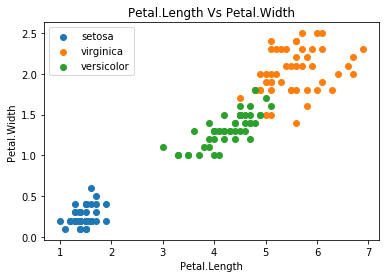

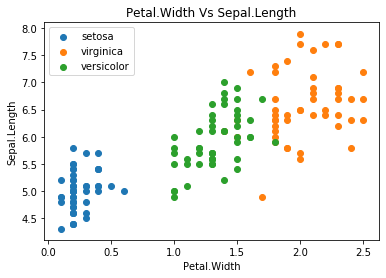

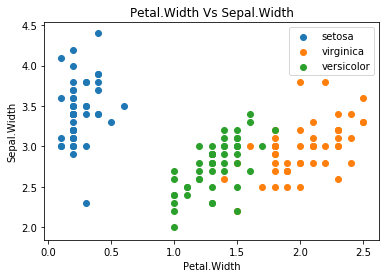

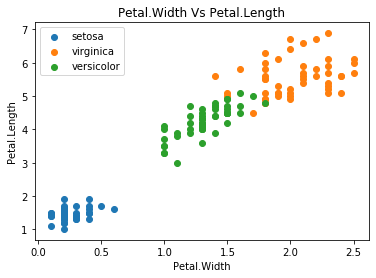

In [8]:
#For All the columns
for col1 in iris_columns:
    for col2 in iris_columns:
        if(col2 != col1):
            plt.scatter(setosa[col1],setosa[col2],label='setosa')
            plt.scatter(virginica[col1],virginica[col2],label='virginica')
            plt.scatter(versicolor[col1],versicolor[col2],label='versicolor')
            plt.title(f'{col1} Vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

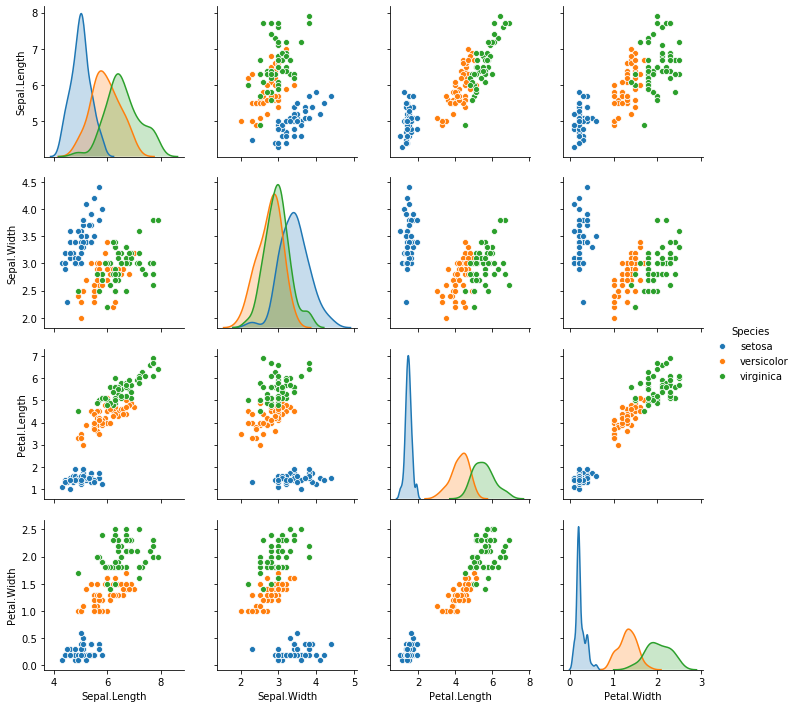

In [9]:
#Using sns pairplot
sns.pairplot(iris,hue='Species')
plt.show()

###  <span style="color:blue"> 2. In wine quality dataset, plot a correlation matrix for all numerical variables and find out which columns are highly correlated to each other.</span>

In [10]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
num_cols = list(wine_quality.select_dtypes(exclude='O').columns)
num_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

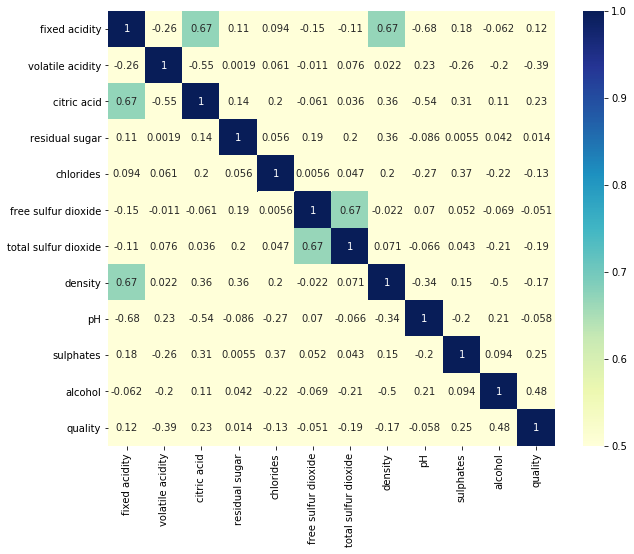

In [12]:
corr = wine_quality[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,vmin=0.5,cmap='YlGnBu')#cmap='YlGnBu'
plt.show()

#### Positive correlation
<em>citric acid</em> and <em>fixed acidity</em> are positively correlated with value of  <strong> 0.67 </strong> <br>
<em>density</em> and <em>fixed acidity</em> are positively correlated with value of  <strong> 0.67 </strong><br>
<em>total sulfur dioxide</em> and <em>free sulfar dioxide</em> are positively correlated with value of  <strong> 0.67 </strong><br>

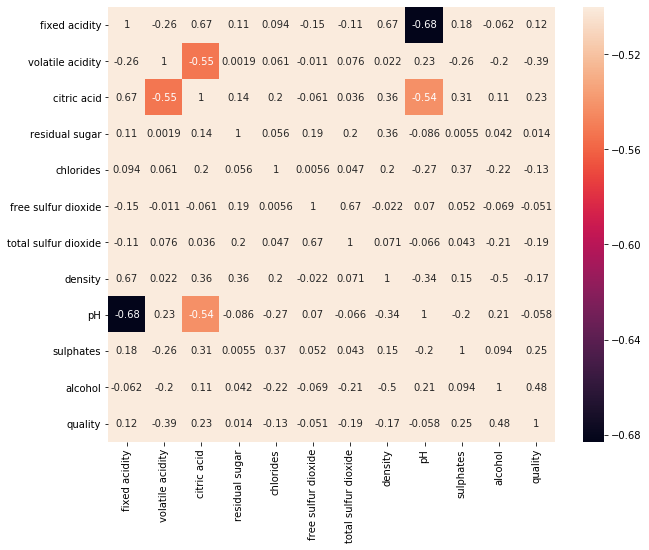

In [13]:
corr = wine_quality[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,vmax=-0.5)
plt.show()

#### Negative correlation
<em>citric acid</em> and <em>volatile acidity</em> are negatively correlated with value of  <strong> -0.55 </strong> <br>
<em>ph</em> and <em>fixed acidity</em> are negatively correlated with value of  <strong> -0.68 </strong><br>
<em>ph</em> and <em>citric acid</em> are negatively correlated with value of  <strong> -0.54 </strong><br>

###  <span style="color:blue">3. Plot subplots for categorical features in titanic dataset , consisting of rows = 3 and columns = 2 format.</span>

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_cat = titanic.select_dtypes(include='O')
titanic_cat.drop(['Name'],axis=1,inplace=True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
titanic_cat.head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


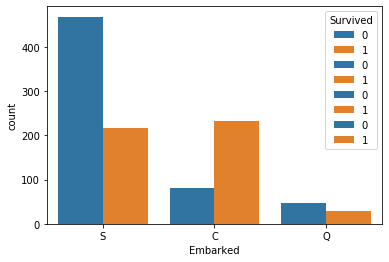

In [17]:
for col in titanic_cat.columns:
    sns.countplot(titanic[col],hue=titanic['Survived'])
plt.show()

 <span style="color:blue">4. In the diabetes dataset, visualize the numerical variables using histogram and make use of subplots while plotting.</span>

 <span style="color:blue">5. Plot an roc curve depicting the True Positive Rate(TPR) and False Positive Rate(FPR) in Diabetes dataset.</span>

 <span style="color:blue">6. In the breast cancer dataset, visualize the malignant and benign diagnosis.</span>

 <span style="color:blue">7. In the same breast cancer dataset, plot the columns 'radius_mean', 'texture_mean' along with the col 'perimeter_mean'.</span>

 <span style="color:blue">8. In the diabetes dataset , plot the confusion matrix along with the ROC Curve using subplot.</span>

 <span style="color:blue">9. In Boston housing dataset, plot scatter of 'LSTAT' Vs 'MEDV', 'INDUS' Vs 'MEDV' and 'TAX' and 'MEDV'.</span>

 <span style="color:blue">10. In the diabetes dataset, plot a pie-chart showing % of diabetes and % of non-diabetes.</span>